# Titanic Project:
# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [89]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [90]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we can see that there are total 12 columns in this data set giving informations about the passengers travelling,in Titanic.we have to find how many pople survived in the disaster that occured in 1912.the survived column is target variable,which is categorical,consisting of values 0 and 1(0=Noand 1=yes).Thus we need to make a perfect categorical model to predict the no of people survived.The other categorical columns are Sex,which consists of male and female,embarked(Port of Embarkation) consist of S,C,Q(S=Southampton,C=Cherbourg and Q=Queenstown) and P class which is ordinal in nature(1=first class,2=second class,3=third class).The numerical columns are Age, Fare,SibSp and Parch.from which Age and fare is continuous in natue and Sibsp and parch are discrete in nature.Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Passenger id ,survived ,pclass,sibSp and Parched contains integer type of values ,Age and Fare have float values,and Name,Sex,Ticket,Cabin and Embarked have object type values.

In [92]:
df.shape

(891, 12)

There are 891 columns and 12 rows in the dataset.So we can conclude that we got total informations of 891 passengers.

In [93]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Passenger id ,survived ,pclass,sibSp and Parched contains integer type of values ,Age and Fare have float values,and Name,Sex,Ticket,Cabin and Embarked have object type values.

In [94]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Found out all the column names of the dataset.

In [95]:
#Statistical 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the Age,Cabin and Embarked is having null values in it .we will drop cabin for sure because i think this column will not contribute in predicting the no of person survived,as most of the data is missing.

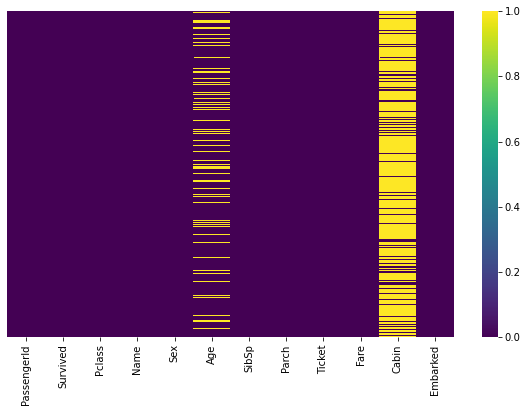

In [97]:
# Checking missing values by Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis')
plt.show()

we can clearly picturize that cabin and Age have huge no of missing values.

In [98]:
# Dropping Cibin column from the dataset
df.drop(columns=['Cabin'],axis=1,inplace=True)

“Cabin” has missed about 80% values. We will not use this variable.

In [99]:
# Checking after deleting cabin column
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Filling up the null values of Age with simple imputer:

In [100]:
from sklearn.impute import SimpleImputer

In [101]:
imp_mean=SimpleImputer(missing_values=np.NAN,strategy='mean')

In [102]:
df.loc[:,['Age']]=imp_mean.fit_transform(df.loc[:,['Age']])

In [103]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Null values filled in Age column,Still there is two null values in Embarked column,we will delete the  Embarked column,as it is not relatable to find the target variable "Survived".

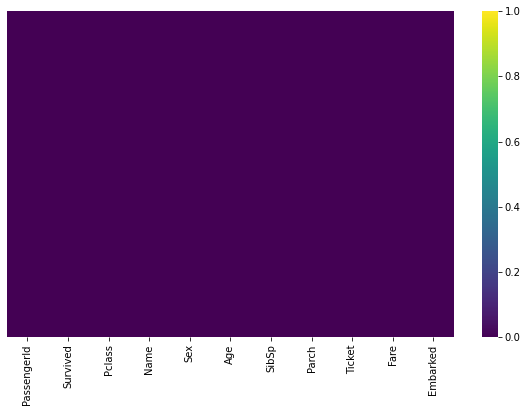

In [104]:
# Plotting the hetmap to check the nullvalues are filled or not:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis')
plt.show()

Null values are filled in Age column.Showing no null values in this heat map.

In [105]:
# Checking Skewness
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

There is huge skewness in SibSp,Parch and Fare Column,we have to remove the skewness for this column for getting better accuracy score.

# Encoding the "Sex " Column:

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le=LabelEncoder()

In [108]:
df.loc[:,['Sex']]=le.fit_transform(df.loc[:,['Sex']])

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


Encoded the sex column with label encoder with 1(male) and 0(female).

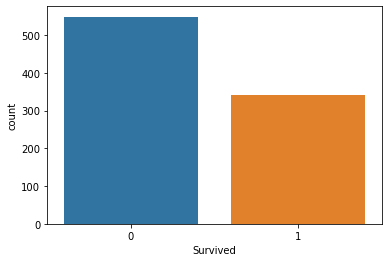

In [110]:
sns.countplot('Survived',data=df)
plt.show()

By this countplot we can declare that 0 values are more than 1,which means not survived is more than survived.(as 0= not survived and 1=Survived) from total 891 passengers.

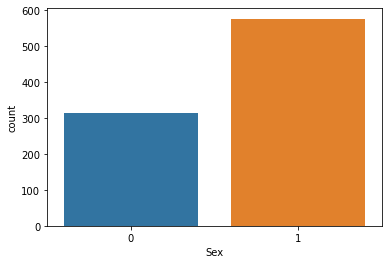

In [111]:
sns.countplot('Sex',data=df)
plt.show()

We can conclude that Male passengers are more than the female passengers on tht day.

In [112]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

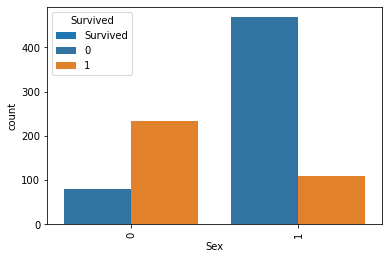

In [113]:
# Survived vs Sex 
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=df,)
plt.show()

We can conclude by this countplot that Male survival rate is less than the female survival rate.

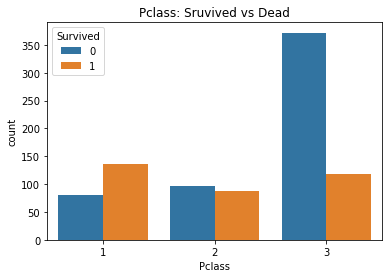

In [114]:
# P class vs Survived
sns.countplot('Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

We can conclude that 3rd class passengers died mostly among all the 891 passengers.

In [115]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

By this data frame we can separately view the PClass,Sex and Survived values.(Sex,1=male and 0=female,Survived 0=Not Survived and 1 =survived)
*highest no deaths is in 3rd class=372 passengers.
*lowest no of death is in 1st clas =80 passengers.
*Female deaths =81
*Male Deaths=300

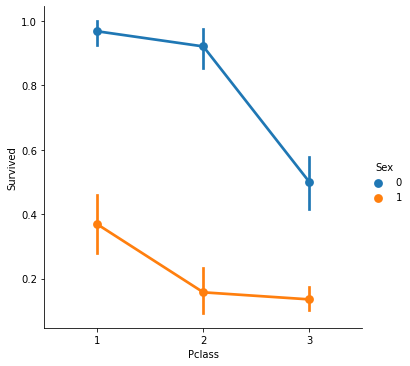

In [116]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

FeMale survival rate is higher than male Survival rate.

In [117]:
# Other stats
print('Oldest person Survived was of:',df['Age'].max())
print('Youngest person Survived was of:',df['Age'].min())
print('Average person Survived was of:',df['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.699117647058763


In [118]:
df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)


Droping this four columns,'PassengerId','Name','Ticket' and 'Embarked'.

In [119]:
#checking after deleting the columns
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# Bivariate Analysis and Multivariate Analysis:

# Heat Map:

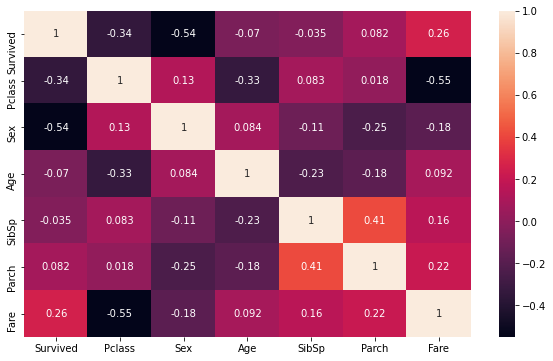

In [120]:
#Checking multicoliniearity ofFeature vs Feature and Feature vs Label with Heat map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

The corelation between the features and label is very low.The least is between pclass and Fare which is -0.55.

# Let's visualize how data is distributed for the columns:

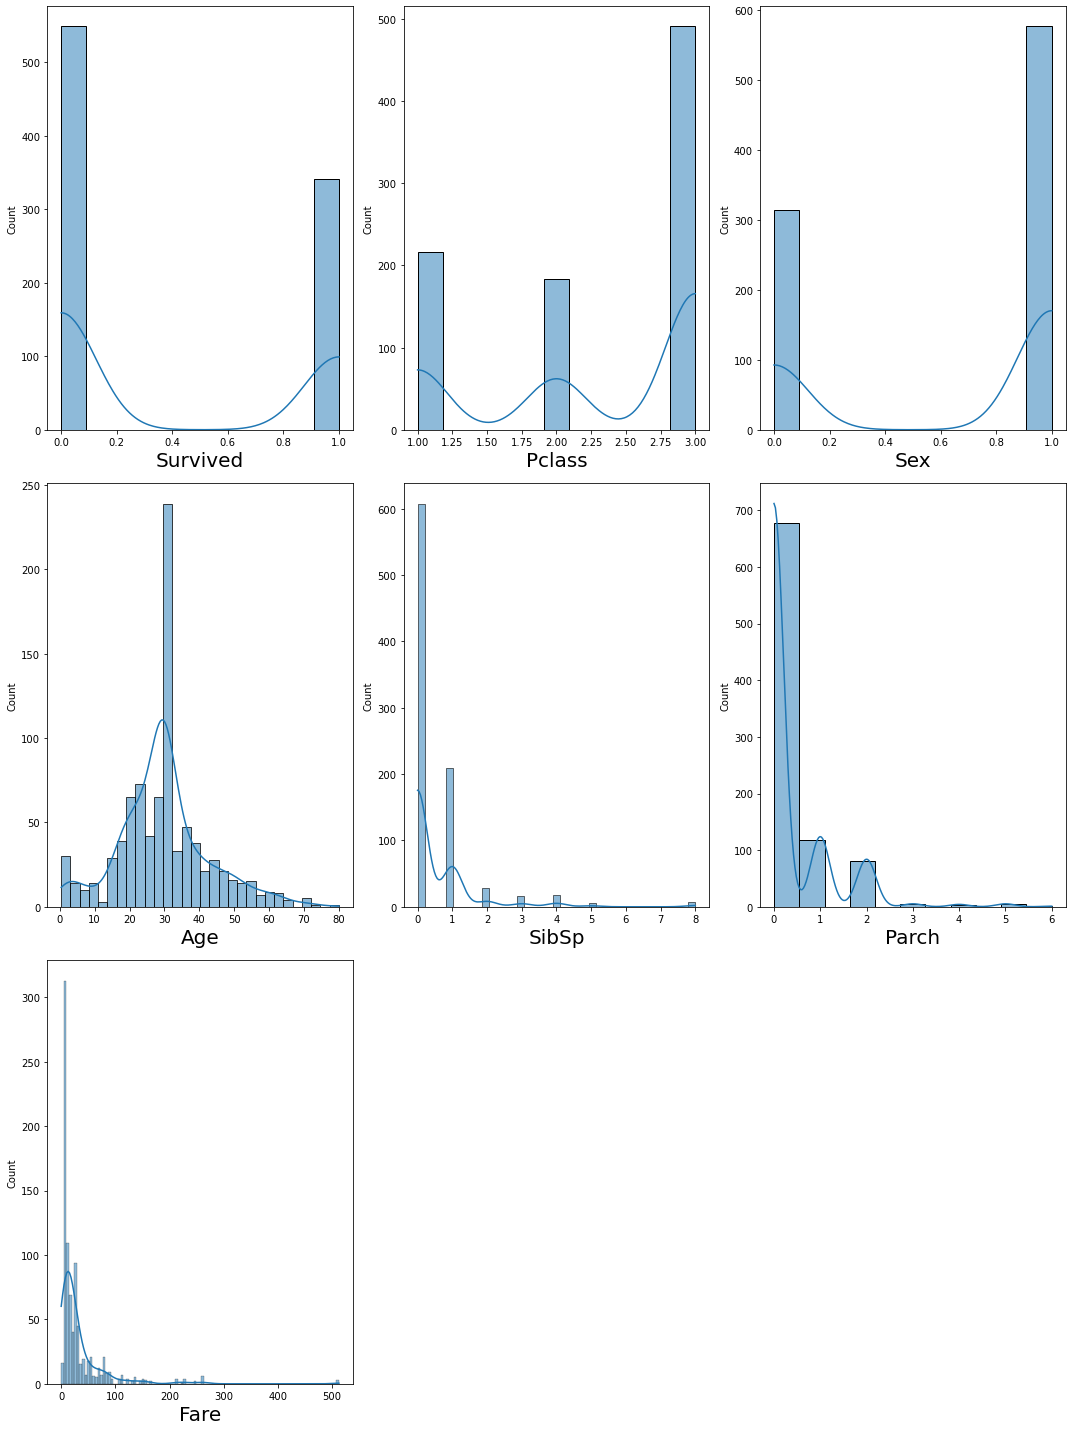

In [121]:
df_features = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare',]]
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Only Age column is normally distributed and all the column is having skewness,which we have to remove by using Z-score.

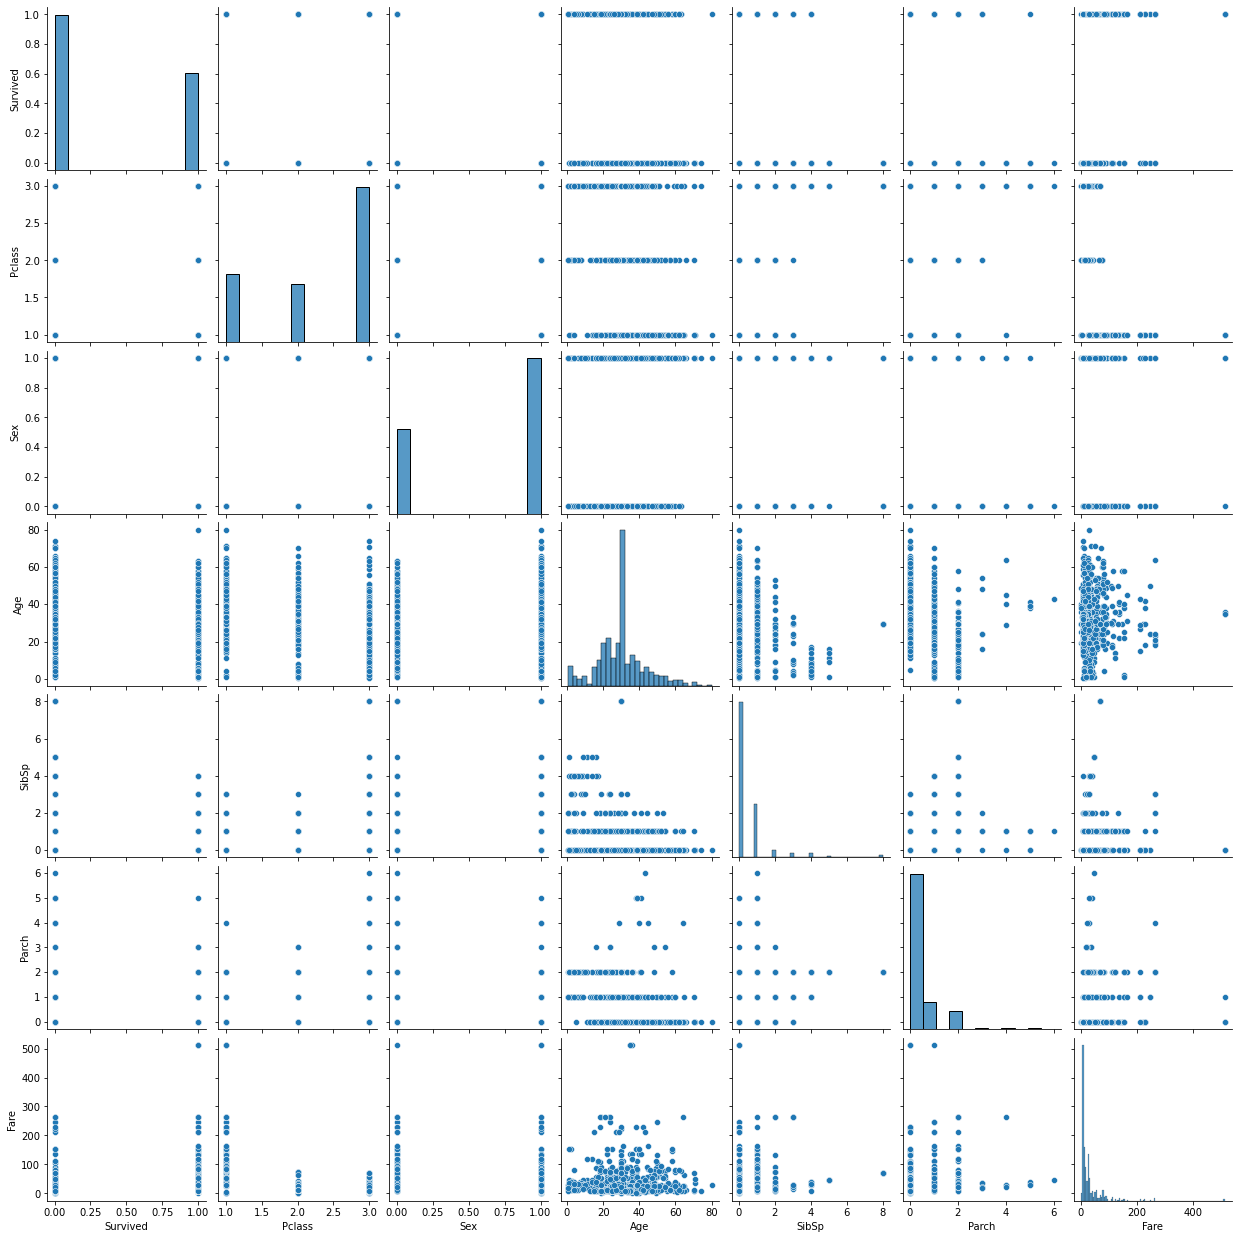

In [122]:
sns.pairplot(df)

Only Age column is normally distributed and all the column is having skewness,which we have to remove by using Z-score.

# Outlier Removal by using Z-score :

In [123]:
from scipy.stats import zscore

In [124]:
z_score = zscore(df)
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.390244,2.310976,0.657317,29.792831,0.348780,0.254878,25.836051
std,0.488103,0.826678,0.474896,12.151418,0.619434,0.565308,29.817529
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700


In [125]:
z_score

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [126]:
df.shape

(820, 7)

We lost 10% of data by using z-score,we cant loose more data further.

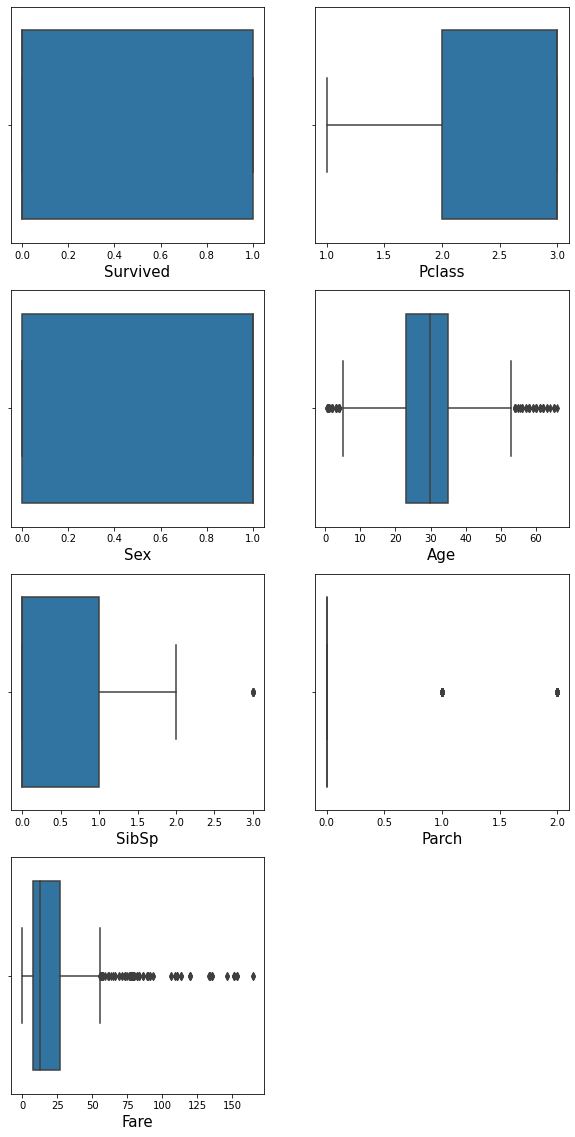

In [127]:
# Checking outliers after using z-score
plt.figure(figsize=(10,20))
graph=1
for column in df:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Still there is skewness in SibSp,Fare and Parch column .We cant loose data further,so we can't apply any outlier removal techniques.

In [128]:
#Parch - Number of Parents/Children Aboard
print(df['Parch'].unique())
print('\n')
print(df['Parch'].value_counts())

[0 1 2]


0    664
1    103
2     53
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

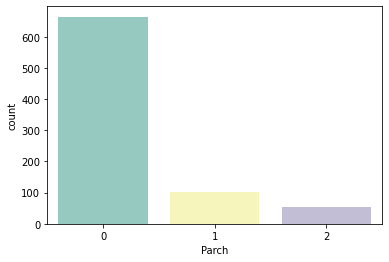

In [129]:
sns.countplot(x = 'Parch', data = df, palette="Set3")

Parch class value 0 contains the highest values which is 664.

In [130]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

Checking skewness again,we can see that SibSP,Parch and Fare have skewness,we will try to reduce the skewness of these column by using log transformation in next step.

In [131]:
# Using Log transformation to reduce the skewness
for cols in df.columns:
    if (df.skew().loc[cols]>0.55):
        df.loc[:,cols]=np.log1p(df.loc[:,cols])

In [132]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.292829
Parch       1.832391
Fare        0.196364
dtype: float64

We reduced some percantage of skewness after using log transformation ,but still there is skewness.

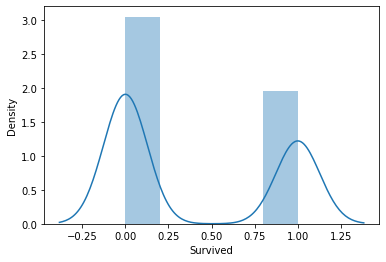

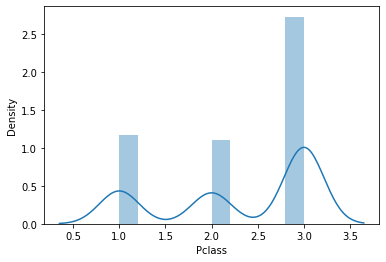

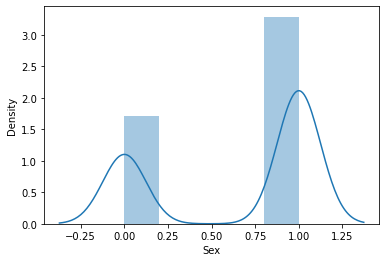

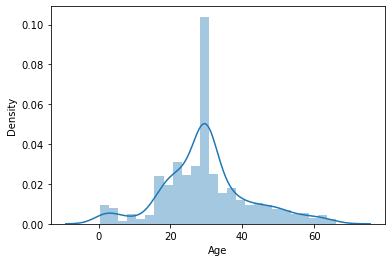

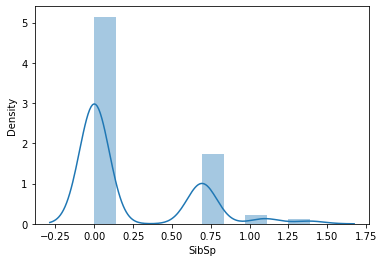

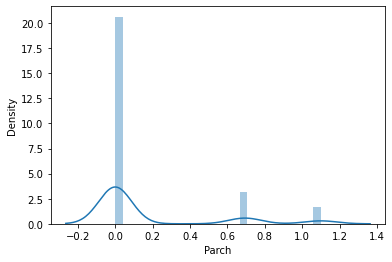

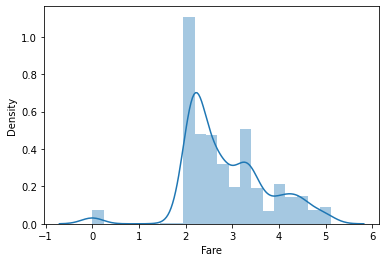

In [133]:
# Using Distplot to check the normal distribution after reducing skewness.
sns.distplot(df['Survived'])
plt.show()

sns.distplot(df['Pclass'])
plt.show()

sns.distplot(df['Sex'])
plt.show()

sns.distplot(df['Age'])
plt.show()

sns.distplot(df['SibSp'])
plt.show()

sns.distplot(df['Parch'])
plt.show()

sns.distplot(df['Fare'])
plt.show()


In [134]:
# Multicolinearity Detection
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.322306,-0.554888,-0.090926,0.125071,0.207543,0.367300
Pclass,-0.322306,1.000000,0.138041,-0.327522,-0.088659,-0.079184,-0.695330
Sex,-0.554888,0.138041,1.000000,0.094544,-0.208961,-0.255970,-0.271793
Age,-0.090926,-0.327522,0.094544,1.000000,-0.130058,-0.258416,0.142154
SibSp,0.125071,-0.088659,-0.208961,-0.130058,1.000000,0.328831,0.378679
Parch,0.207543,-0.079184,-0.255970,-0.258416,0.328831,1.000000,0.315959
Fare,0.367300,-0.695330,-0.271793,0.142154,0.378679,0.315959,1.000000


# Dividing the dataset into features and label:

In [135]:
y = df['Survived']
x = df.drop(columns=['Survived'])
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,0.693147,0.000000,2.110213
1,1,0,38.000000,0.693147,0.000000,4.280593
2,3,0,26.000000,0.000000,0.000000,2.188856
3,1,0,35.000000,0.693147,0.000000,3.990834
4,3,1,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057
887,1,0,19.000000,0.000000,0.000000,3.433987
888,3,0,29.699118,0.693147,1.098612,3.196630
889,1,1,26.000000,0.000000,0.000000,3.433987


# Standardization:-

In [136]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,0.693147,0.000000,2.110213
1,1,0,38.000000,0.693147,0.000000,4.280593
2,3,0,26.000000,0.000000,0.000000,2.188856
3,1,0,35.000000,0.693147,0.000000,3.990834
4,3,1,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057
887,1,0,19.000000,0.000000,0.000000,3.433987
888,3,0,29.699118,0.693147,1.098612,3.196630
889,1,1,26.000000,0.000000,0.000000,3.433987


# VIF :

In [137]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.275848,Pclass
1,1.132021,Sex
2,1.247128,Age
3,1.317099,SibSp
4,1.317189,Parch
5,2.633425,Fare


There is so much co-relation between the features.We cant loose dara further because we have very less columns in the dataset.

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

# Creating Model:

# 1.Logistic Regression:

In [139]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:78.70%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.808290    0.751092  0.786992    0.779691      0.785411
recall       0.845528    0.699187  0.786992    0.772358      0.786992
f1-score     0.826490    0.724211  0.786992    0.775350      0.785578
support    369.000000  246.000000  0.786992  615.000000    615.000000
 Confusion Matrix:
[[312  57]
 [ 74 172]]



In [140]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:81.95%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856061   0.753425  0.819512    0.804743      0.819012
recall       0.862595   0.743243  0.819512    0.802919      0.819512
f1-score     0.859316   0.748299  0.819512    0.803807      0.819241
support    131.000000  74.000000  0.819512  205.000000    205.000000
 Confusion Matrix:
[[113  18]
 [ 19  55]]



In [141]:
roc_auc_score(y_test,lr.predict(x_test))

0.8029193315452857

# 2.Decission Tree Classifier

In [142]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:97.72%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.968338    0.991525  0.977236    0.979932      0.977613
recall       0.994580    0.951220  0.977236    0.972900      0.977236
f1-score     0.981283    0.970954  0.977236    0.976119      0.977152
support    369.000000  246.000000  0.977236  615.000000    615.000000
 Confusion Matrix:
[[367   2]
 [ 12 234]]



In [143]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:82.93%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.847826   0.791045  0.829268    0.819435      0.827329
recall       0.893130   0.716216  0.829268    0.804673      0.829268
f1-score     0.869888   0.751773  0.829268    0.810831      0.827252
support    131.000000  74.000000  0.829268  205.000000    205.000000
 Confusion Matrix:
[[117  14]
 [ 21  53]]



In [144]:
roc_auc_score(y_test,dt.predict(x_test))

0.8046729936042913

# 3. Random Forrest Classifier:

In [145]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:97.72%
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision    0.98103    0.971545  0.977236    0.976287      0.977236
recall       0.98103    0.971545  0.977236    0.976287      0.977236
f1-score     0.98103    0.971545  0.977236    0.976287      0.977236
support    369.00000  246.000000  0.977236  615.000000    615.000000
 Confusion Matrix:
[[362   7]
 [  7 239]]



In [146]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")

Accuracy score:84.88%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.857143   0.830769   0.84878    0.843956      0.847623
recall       0.916031   0.729730   0.84878    0.822880      0.848780
f1-score     0.885609   0.776978   0.84878    0.831294      0.846396
support    131.000000  74.000000   0.84878  205.000000    205.000000
 Confusion Matrix:
[[120  11]
 [ 20  54]]



In [147]:
roc_auc_score(y_test,rf.predict(x_test))

0.8228801320404374

# 4.K-Neighbors Classifier:

In [148]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:85.69%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863049    0.846491  0.856911    0.854770      0.856426
recall       0.905149    0.784553  0.856911    0.844851      0.856911
f1-score     0.883598    0.814346  0.856911    0.848972      0.855897
support    369.000000  246.000000  0.856911  615.000000    615.000000
 Confusion Matrix:
[[334  35]
 [ 53 193]]



In [149]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:81.95%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.840580   0.776119  0.819512    0.808350      0.817311
recall       0.885496   0.702703  0.819512    0.794099      0.819512
f1-score     0.862454   0.737589  0.819512    0.800021      0.817380
support    131.000000  74.000000  0.819512  205.000000    205.000000
 Confusion Matrix:
[[116  15]
 [ 22  52]]



In [150]:
roc_auc_score(y_test,kn.predict(x_test))

0.7940994429544047

# 5. Support vector Classifier:

In [151]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:82.93%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856061   0.753425  0.819512    0.804743      0.819012
recall       0.862595   0.743243  0.819512    0.802919      0.819512
f1-score     0.859316   0.748299  0.819512    0.803807      0.819241
support    131.000000  74.000000  0.819512  205.000000    205.000000
 Confusion Matrix:
[[332  37]
 [ 68 178]]



In [152]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:83.41%
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848921   0.803030  0.834146    0.825976      0.832355
recall       0.900763   0.716216  0.834146    0.808490      0.834146
f1-score     0.874074   0.757143  0.834146    0.815608      0.831865
support    131.000000  74.000000  0.834146  205.000000    205.000000
 Confusion Matrix:
[[118  13]
 [ 21  53]]



In [153]:
roc_auc_score(y_test,svc.predict(x_test))

0.8084897874974211

# CROSS VALIDATION SCORE:

In [154]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:78.66%


In [155]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:75.73%


In [156]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:80.98%


In [157]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:77.07%


In [158]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:65.49%


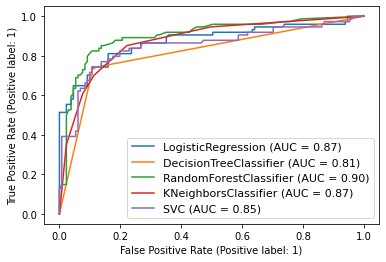

In [159]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Random forrest classifier is giving the highest score 90% avove.
1.logistic regression-78.21-78.90=-0.69 2.Decision tree classifier-97.72-75.73=21.99 3.Random forrest classifier--97.72-80.12=17.6 4.KNN-85.53-77.44=8.09 5.SVC-83.58-65.98=17.6
Choosing random forrest model as the final model because ,we got 90% in ROC_AUC ,score and we got least differnce between the accuracy score and cross validation score.

# Hyper Parameter Tuning of Random forest Classifier model:


In [160]:
grid_param={
   'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}

In [705]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [706]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [707]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


In [708]:
rf = RandomForestClassifier(criterion= 'gini',max_depth=10,min_samples_leaf = 5, min_samples_split=11,n_estimators =13)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8146341463414634

After doing hyperparameter of Random Forrest model,we got the score of 81.4%.

In [709]:
# model prediction using DT
x_predict = list(rf.predict(x_test))
rf_titanic = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_titanic))

     predicted_values  orignal_values
693                 0               0
364                 0               0
75                  0               0
739                 0               0
432                 1               1
..                ...             ...
285                 0               0
230                 1               1
445                 1               1
802                 1               1
101                 0               0

[205 rows x 2 columns]


In [710]:
#import joblib
import joblib

joblib.dump(dt,'rf_titanic_file.obj')

# SAVING THE MODEL

['rf_titanic_file.obj']

In [711]:
rf_from_joblib=joblib.load('rf_titanic_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0], dtype=int64)

# Conclusion:
The purpose of Titanic dataset is to use the existing features of passengers onboard Titanic as predictors to predict their survival outcome, for 0 being dead and 1 being survived from the tragic ship crash.  The binary logistic regression is first performed with the glm, and improved performance with the Support Vector Machine (SVM) analysis. It is certain through the practice of model improvement, the SVM analysis is better performed than the original logistic regression analysis for prediction accuracy.But choose the Random forest classifier model because we got 90% in ROC_AUC ,score and we got least differnce between the accuracy score and cross validation score.
However, even from the Random Forrest Regression model, we can easily see that the Titanic survival outcome is highly depended on several predictors, such as sex, age and passenger class. In particular, female are more likely to survived than male while keeping other predictors conditions constant, older people are less likely to survived while keeping other predictors conditions constant; and lastly, people from a lower class are less likely to survived keeping other predictors conditions constant.